In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


#Read csv file
df=pd.read_csv('census_03.csv')
df


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9682,1,Williams Manorhouse,Sylvia,Day,17,Daughter,NaN,Female,Student,None,NaN
9683,1,Williams Manorhouse,Tracy,Day,11,Daughter,NaN,Female,Student,None,NaN
9684,1,Williams Manorhouse,Lisa,Day,9,Daughter,NaN,Female,Student,None,NaN
9685,1,Williams Manorhouse,Dennis,Day,4,Son,NaN,Male,Child,None,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9687 entries, 0 to 9686
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9683 non-null   object
 1   Street                         9686 non-null   object
 2   First Name                     9685 non-null   object
 3   Surname                        9686 non-null   object
 4   Age                            9687 non-null   object
 5   Relationship to Head of House  9686 non-null   object
 6   Marital Status                 7440 non-null   object
 7   Gender                         9684 non-null   object
 8   Occupation                     9687 non-null   object
 9   Infirmity                      9687 non-null   object
 10  Religion                       7389 non-null   object
dtypes: object(11)
memory usage: 832.6+ KB


In [3]:
# first 5 rows
df.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian


In [4]:
#shape of the data
print(df.shape)

(9687, 11)


In [5]:
#type of the data
print(df.dtypes)

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object


In [6]:
# number of missing data/vale per column

#missing_values_count

df.isnull().sum()

House Number                        4
Street                              1
First Name                          2
Surname                             1
Age                                 0
Relationship to Head of House       1
Marital Status                   2247
Gender                              3
Occupation                          0
Infirmity                           0
Religion                         2298
dtype: int64

In [7]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

[]


In [8]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols= df_non_numeric.columns.values
print(non_numeric_cols)

['House Number' 'Street' 'First Name' 'Surname' 'Age'
 'Relationship to Head of House' 'Marital Status' 'Gender' 'Occupation'
 'Infirmity' 'Religion']


<AxesSubplot:>

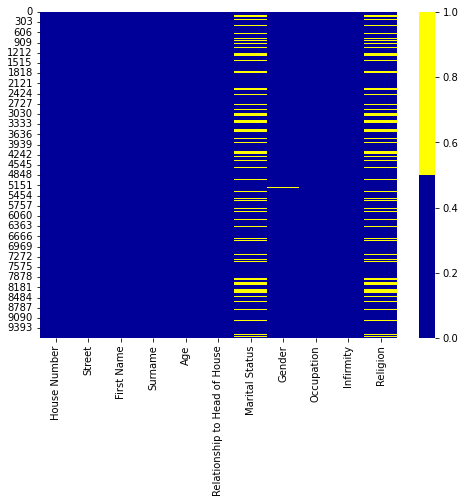

In [9]:
#Missing Data/Value #Using Missing Data heatmap
import matplotlib.pyplot as plt
cols = df.columns
plt.figure(figsize = (8, 6)) 
colours = ['#000099', '#ffff00'] # yellow is missing, blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [10]:
#Missing Data/Value
#Using Missing Data percentage list
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'. format(col, round(pct_missing*100)))

House Number - 0%
Street - 0%
First Name - 0%
Surname - 0%
Age - 0%
Relationship to Head of House - 0%
Marital Status - 23%
Gender - 0%
Occupation - 0%
Infirmity - 0%
Religion - 24%


created missing indicator for: House Number
created missing indicator for: Street
created missing indicator for: First Name
created missing indicator for: Surname
created missing indicator for: Relationship to Head of House
created missing indicator for: Marital Status
created missing indicator for: Gender
created missing indicator for: Religion


<AxesSubplot:xlabel='index'>

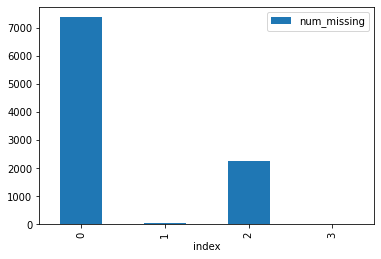

In [11]:
#Missing Data/Value
#missing data histogram

#creating missing indicator for features with missing data

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing> 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
#then based on the indicator, plot the histogram of missing values

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [12]:
#unique values Age #blank #twelve #three #-1 #0.3, #11.1 #41.4 #322,  #80.21545403, #82.21545403 #91.97455657 #93.97455657 #28.0

df['Age'].unique()


array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 'three', '79', '82', '51', '4', '83', '63', '77',
       '68', '84', '87', '89', '75', '93', '11.1', '97', '86', '92', '94',
       '90', '101', '103', '100', ' ', 'twelve', '-1', '0.3', '41.4',
       '104', '322', '99', '80.21545403', '82.21545403', '102',
       '91.97455657', '93.97455657', '28.0', '105', '107'], dtype=object)

In [13]:
df['Age']=df['Age'].replace(to_replace='three', value= 3)
df['Age']=df['Age'].replace(to_replace='twelve', value=12)
df['Age']=df['Age'].replace(to_replace='11.1', value=11)
df['Age']=df['Age'].replace(to_replace='41.4', value=41)
df['Age']=df['Age'].replace(to_replace='28.0', value=28)
df['Age']=df['Age'].replace(to_replace='80.21545403', value=80)
df['Age']=df['Age'].replace(to_replace='82.21545403', value=82)
df['Age']=df['Age'].replace(to_replace='91.97455657', value=91)
df['Age']=df['Age'].replace(to_replace='93.97455657', value=93)
df['Age']=df['Age'].replace(to_replace='0.3', value=0)
df['Age'].unique()


array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 3, '79', '82', '51', '4', '83', '63', '77', '68',
       '84', '87', '89', '75', '93', 11, '97', '86', '92', '94', '90',
       '101', '103', '100', ' ', 12, '-1', 0, 41, '104', '322', '99', 80,
       82, '102', 91, 93, 28, '105', '107'], dtype=object)

In [14]:
#investigating ' ' #blank Age
df['Age'][df['Age']==' ']

4594     
8813     
Name: Age, dtype: object

In [15]:
df.loc[4594]

House Number                                                  28
Street                                     Honeysucklebag Avenue
First Name                                                 Billy
Surname                                                    Smith
Age                                                             
Relationship to Head of House                            Husband
Marital Status                                           Married
Gender                                                      Male
Occupation                                        Air cabin crew
Infirmity                                                   None
Religion                                               Methodist
House Number_ismissing                                     False
Street_ismissing                                           False
First Name_ismissing                                       False
Surname_ismissing                                          False
Relationship to Head of H

In [16]:
df.loc[8813]

House Number                                           28
Street                                       Yellow Inlet
First Name                                        Malcolm
Surname                                           Johnson
Age                                                      
Relationship to Head of House                     Husband
Marital Status                                    Married
Gender                                               Male
Occupation                                 Office manager
Infirmity                                            None
Religion                                           Muslim
House Number_ismissing                              False
Street_ismissing                                    False
First Name_ismissing                                False
Surname_ismissing                                   False
Relationship to Head of House_ismissing             False
Marital Status_ismissing                            False
Gender_ismissi

In [17]:
df['Age']=df['Age'].replace(to_replace=' ', value=35)
df['Age'].unique()

array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 3, '79', '82', '51', '4', '83', '63', '77', '68',
       '84', '87', '89', '75', '93', 11, '97', '86', '92', '94', '90',
       '101', '103', '100', 35, 12, '-1', 0, 41, '104', '322', '99', 80,
       82, '102', 91, 93, 28, '105', '107'], dtype=object)

In [18]:
#investigating -1 Age
df['Age'][df['Age']=='-1']

6730    -1
Name: Age, dtype: object

In [19]:
df.loc[6730]

House Number                                           29
Street                                     Gregory Rapids
First Name                                        William
Surname                                            Thomas
Age                                                    -1
Relationship to Head of House                         Son
Marital Status                                        NaN
Gender                                               Male
Occupation                                          Child
Infirmity                                            None
Religion                                              NaN
House Number_ismissing                              False
Street_ismissing                                    False
First Name_ismissing                                False
Surname_ismissing                                   False
Relationship to Head of House_ismissing             False
Marital Status_ismissing                             True
Gender_ismissi

In [20]:
# -1 age in this scenarior is a an error considering the features of the individual occupation as child male, son to head of house and occupation role
#hence, either a pregnancy or error will be corrected replacing with 0
df['Age']=df['Age'].replace(to_replace='-1', value=0)
df['Age'].unique()


array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 3, '79', '82', '51', '4', '83', '63', '77', '68',
       '84', '87', '89', '75', '93', 11, '97', '86', '92', '94', '90',
       '101', '103', '100', 35, 12, 0, 41, '104', '322', '99', 80, 82,
       '102', 91, 93, 28, '105', '107'], dtype=object)

In [21]:
#investigating outlier Age 322
df['Age'][df['Age']=='322']

6991    322
Name: Age, dtype: object

In [22]:
df.loc[6991]

House Number                                                       4
Street                                                    Burns Road
First Name                                                    Justin
Surname                                                         Howe
Age                                                              322
Relationship to Head of House                                 Lodger
Marital Status                                                Single
Gender                                                          Male
Occupation                                 Health and safety adviser
Infirmity                                                       None
Religion                                                   Christian
House Number_ismissing                                         False
Street_ismissing                                               False
First Name_ismissing                                           False
Surname_ismissing                 

In [23]:
#Oulier possibly due to error as individual is a single male, health and safety Aviser(actively employed) can be classified as a 32
df['Age']=df['Age'].replace(to_replace='322', value=32)
df['Age'].unique()

array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 3, '79', '82', '51', '4', '83', '63', '77', '68',
       '84', '87', '89', '75', '93', 11, '97', '86', '92', '94', '90',
       '101', '103', '100', 35, 12, 0, 41, '104', 32, '99', 80, 82, '102',
       91, 93, 28, '105', '107'], dtype=object)

In [24]:
df['Age']=df['Age'].astype(int)
df['Age'].unique()

array([ 31,  91,  88,  73,  41,  43,   5,  53,  54,  85,  71,  22,  70,
        60,  95,  96,  80,  34,  38,  65,  64,  57,  35,  37,  72,   3,
        32,   1,  69,  59,  62,  33,  30,  46,  48,  19,  18,  16,  15,
        24,   0,  27,  14,  10,   6,  45,  47,   9,  23,  36,  21,  20,
        55,  25,  13,   2,  74,  50,  44,  49,  56,  42,  40,  17,  12,
        11,  67,  28,   8,  39,   7,  76,  78,  66,  29,  26,  58,  81,
        61,  52,  79,  82,  51,   4,  83,  63,  77,  68,  84,  87,  89,
        75,  93,  97,  86,  92,  94,  90, 101, 103, 100, 104,  99, 102,
       105, 107])

In [25]:
df['Age']

0       31
1       91
2       88
3       88
4       73
        ..
9682    17
9683    11
9684     9
9685     4
9686    69
Name: Age, Length: 9687, dtype: int32

In [26]:
#unique values House Number #nan #nine

df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [27]:
df['House Number']=df['House Number'].replace(to_replace='nine', value=9)
df['House Number'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [28]:
df['House Number'] = df['House Number'].fillna(0)
df['House Number'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [29]:
df['House Number']=df['House Number'].astype(int)
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [30]:
df['House Number']

0       1
1       2
2       3
3       3
4       4
       ..
9682    1
9683    1
9684    1
9685    1
9686    1
Name: House Number, Length: 9687, dtype: int32

In [31]:
# unique value street #nan
df['Street'].unique()

array(['Barry Avenue', 'Peacock Avenue', 'Merlin Locks', nan,
       'Smith Street', 'Peterborough Bypass', 'Shaw Key',
       'Harrison Vista', 'Cellar Street', 'Vincent Stream', 'Baker Locks',
       'Rogers Parkways', 'Thompson Causeway', 'Wong Islands',
       'Cook Coves', 'Bell Vista', 'Brightwater Locks', 'Silver Wells',
       'Plymouth Lane', 'Dove Road', 'Clementine Plaza', 'Hayes Radial',
       'Anglia Creek', 'Plymouthpull Avenue', 'Baldwin Street',
       'Bastille Junction', 'Solsticekit Lane', 'Lee Stravenue',
       'Davis Crossroad', 'Reeves Lane', 'Carlisle Avenue',
       'Parkes Avenue', 'Collins Street', 'Bentley Street', 'Bishop Road',
       'Orchard Street', 'Carlisle Fort', 'Evans Street', 'Cinnamon Lane',
       'Honeysucklebag Avenue', 'Baker Land', 'Lynch Row',
       'ExcaliburBellsgain Lane', 'Easter Ridge', 'West Mount',
       'Peterborough Circle', 'Lightning Cape', 'Edwards Stream',
       'Knight Street', 'Protectorate Station', 'Glorious Fort',
    

In [32]:
Street=df['Street']
print("Mode:", Street.mode())

Mode: 0    Lee Stravenue
dtype: object


In [33]:
df['Street'][df['Street']=='Lee Stravenue']

2442    Lee Stravenue
2443    Lee Stravenue
2444    Lee Stravenue
2445    Lee Stravenue
2446    Lee Stravenue
            ...      
3635    Lee Stravenue
3636    Lee Stravenue
3637    Lee Stravenue
3638    Lee Stravenue
3639    Lee Stravenue
Name: Street, Length: 1198, dtype: object

In [34]:
df['Street'].describe()

count              9686
unique              105
top       Lee Stravenue
freq               1198
Name: Street, dtype: object

In [35]:
df['Street'] = df['Street'].replace(to_replace=np.nan, value='Lee Stravenue')
df['Street'].unique()

array(['Barry Avenue', 'Peacock Avenue', 'Merlin Locks', 'Lee Stravenue',
       'Smith Street', 'Peterborough Bypass', 'Shaw Key',
       'Harrison Vista', 'Cellar Street', 'Vincent Stream', 'Baker Locks',
       'Rogers Parkways', 'Thompson Causeway', 'Wong Islands',
       'Cook Coves', 'Bell Vista', 'Brightwater Locks', 'Silver Wells',
       'Plymouth Lane', 'Dove Road', 'Clementine Plaza', 'Hayes Radial',
       'Anglia Creek', 'Plymouthpull Avenue', 'Baldwin Street',
       'Bastille Junction', 'Solsticekit Lane', 'Davis Crossroad',
       'Reeves Lane', 'Carlisle Avenue', 'Parkes Avenue',
       'Collins Street', 'Bentley Street', 'Bishop Road',
       'Orchard Street', 'Carlisle Fort', 'Evans Street', 'Cinnamon Lane',
       'Honeysucklebag Avenue', 'Baker Land', 'Lynch Row',
       'ExcaliburBellsgain Lane', 'Easter Ridge', 'West Mount',
       'Peterborough Circle', 'Lightning Cape', 'Edwards Stream',
       'Knight Street', 'Protectorate Station', 'Glorious Fort',
       'Y

In [36]:
# unique value First Name
df['First Name'].unique() #B, #S, #nan, #E 

array(['Gail', 'Grace', 'John', 'Andrea', 'Jade', 'Sylvia', 'Denis',
       'Carolyn', 'Irene', 'Mathew', 'Helen', 'Gareth', 'Susan', 'Emily',
       'Shaun', 'Joel', 'Ross', 'Wayne', 'Molly', 'Jason', 'Aimee',
       'Eileen', 'Liam', 'Damien', 'Jenna', 'Catherine', 'Teresa', 'Mary',
       'Hayley', 'Glenn', 'Victor', 'Wendy', 'Raymond', 'Ann', 'Timothy',
       'Antony', 'Adam', 'Sophie', 'Stewart', 'Hannah', 'Valerie',
       'Nicholas', 'Maria', 'Anthony', 'George', 'Owen', 'Simon',
       'Claire', 'Shannon', 'Terence', 'Katherine', 'Brian', 'Brandon',
       'Chelsea', 'Charlotte', 'Olivia', 'Lewis', 'Jack', 'Yvonne',
       'Rhys', 'Joan', 'Josephine', 'Mohammed', 'Laura', 'Gerard', 'Roy',
       'Elliot', 'Ashley', 'Lynne', 'Edward', 'Christopher', 'Sandra',
       'Lisa', 'Lesley', 'Derek', 'Francesca', 'Sheila', 'Ryan',
       'Rachael', 'Jodie', 'William', 'Jamie', 'Clive', 'Arthur', 'Ellie',
       'Rosemary', 'Oliver', 'Sally', 'Abigail', 'Lucy', 'Sharon',
       'Benjami

In [37]:
df['First Name'][df['First Name']=='B']

2680    B
Name: First Name, dtype: object

In [38]:
df.loc[2680]

House Number                                          37
Street                                     Lee Stravenue
First Name                                             B
Surname                                             Hill
Age                                                   16
Relationship to Head of House                        Son
Marital Status                                       NaN
Gender                                              Male
Occupation                                       Student
Infirmity                                           None
Religion                                             NaN
House Number_ismissing                             False
Street_ismissing                                   False
First Name_ismissing                               False
Surname_ismissing                                  False
Relationship to Head of House_ismissing            False
Marital Status_ismissing                            True
Gender_ismissing               

In [39]:
df['First Name'][df['First Name']=='S']

2703    S
Name: First Name, dtype: object

In [40]:
df.loc[2703]

House Number                                                     41
Street                                                Lee Stravenue
First Name                                                        S
Surname                                                       Smith
Age                                                              33
Relationship to Head of House                                  None
Marital Status                                               Single
Gender                                                       Female
Occupation                                 Magazine features editor
Infirmity                                                      None
Religion                                                     Muslim
House Number_ismissing                                        False
Street_ismissing                                              False
First Name_ismissing                                          False
Surname_ismissing                               

In [41]:
df['First Name'][df['First Name']=='E']

8117    E
Name: First Name, dtype: object

In [42]:
df.loc[8117]

House Number                                                     47
Street                                               Hopenod Avenue
First Name                                                        E
Surname                                                      Walker
Age                                                              54
Relationship to Head of House                                  Head
Marital Status                                               Single
Gender                                                       Female
Occupation                                 Therapist, horticultural
Infirmity                                                      None
Religion                                                   Catholic
House Number_ismissing                                        False
Street_ismissing                                              False
First Name_ismissing                                          False
Surname_ismissing                               

In [43]:
df['First Name']=df['First Name'].replace(to_replace='B', value=np.nan)
df['First Name']=df['First Name'].replace(to_replace='S', value=np.nan)
df['First Name']=df['First Name'].replace(to_replace='E', value=np.nan)
df['First Name']=df['First Name'].replace(to_replace='Jo-anne', value='Jo-Anne')
df['First Name'].unique()


array(['Gail', 'Grace', 'John', 'Andrea', 'Jade', 'Sylvia', 'Denis',
       'Carolyn', 'Irene', 'Mathew', 'Helen', 'Gareth', 'Susan', 'Emily',
       'Shaun', 'Joel', 'Ross', 'Wayne', 'Molly', 'Jason', 'Aimee',
       'Eileen', 'Liam', 'Damien', 'Jenna', 'Catherine', 'Teresa', 'Mary',
       'Hayley', 'Glenn', 'Victor', 'Wendy', 'Raymond', 'Ann', 'Timothy',
       'Antony', 'Adam', 'Sophie', 'Stewart', 'Hannah', 'Valerie',
       'Nicholas', 'Maria', 'Anthony', 'George', 'Owen', 'Simon',
       'Claire', 'Shannon', 'Terence', 'Katherine', 'Brian', 'Brandon',
       'Chelsea', 'Charlotte', 'Olivia', 'Lewis', 'Jack', 'Yvonne',
       'Rhys', 'Joan', 'Josephine', 'Mohammed', 'Laura', 'Gerard', 'Roy',
       'Elliot', 'Ashley', 'Lynne', 'Edward', 'Christopher', 'Sandra',
       'Lisa', 'Lesley', 'Derek', 'Francesca', 'Sheila', 'Ryan',
       'Rachael', 'Jodie', 'William', 'Jamie', 'Clive', 'Arthur', 'Ellie',
       'Rosemary', 'Oliver', 'Sally', 'Abigail', 'Lucy', 'Sharon',
       'Benjami

In [44]:
df['First Name'] = df['First Name'].fillna(0)
df['First Name'].unique()

array(['Gail', 'Grace', 'John', 'Andrea', 'Jade', 'Sylvia', 'Denis',
       'Carolyn', 'Irene', 'Mathew', 'Helen', 'Gareth', 'Susan', 'Emily',
       'Shaun', 'Joel', 'Ross', 'Wayne', 'Molly', 'Jason', 'Aimee',
       'Eileen', 'Liam', 'Damien', 'Jenna', 'Catherine', 'Teresa', 'Mary',
       'Hayley', 'Glenn', 'Victor', 'Wendy', 'Raymond', 'Ann', 'Timothy',
       'Antony', 'Adam', 'Sophie', 'Stewart', 'Hannah', 'Valerie',
       'Nicholas', 'Maria', 'Anthony', 'George', 'Owen', 'Simon',
       'Claire', 'Shannon', 'Terence', 'Katherine', 'Brian', 'Brandon',
       'Chelsea', 'Charlotte', 'Olivia', 'Lewis', 'Jack', 'Yvonne',
       'Rhys', 'Joan', 'Josephine', 'Mohammed', 'Laura', 'Gerard', 'Roy',
       'Elliot', 'Ashley', 'Lynne', 'Edward', 'Christopher', 'Sandra',
       'Lisa', 'Lesley', 'Derek', 'Francesca', 'Sheila', 'Ryan',
       'Rachael', 'Jodie', 'William', 'Jamie', 'Clive', 'Arthur', 'Ellie',
       'Rosemary', 'Oliver', 'Sally', 'Abigail', 'Lucy', 'Sharon',
       'Benjami

In [45]:
df['First Name'][df['First Name']=='Marie Kondo']

2646    Marie Kondo
Name: First Name, dtype: object

In [46]:
df.loc[2646]

House Number                                                                          34
Street                                                                     Lee Stravenue
First Name                                                                   Marie Kondo
Surname                                                                           Harris
Age                                                                                   93
Relationship to Head of House                                                       Head
Marital Status                                                                   Married
Gender                                                                            Female
Occupation                                 Retired Emergency planning/management officer
Infirmity                                                                           None
Religion                                                                            None
House Number_ismissin

In [47]:
df['First Name'][df['First Name']=='Daniel Day']

2647    Daniel Day
Name: First Name, dtype: object

In [48]:
df.loc[2647]

House Number                                                    34
Street                                               Lee Stravenue
First Name                                              Daniel Day
Surname                                                     Harris
Age                                                             95
Relationship to Head of House                              Husband
Marital Status                                             Married
Gender                                                        Male
Occupation                                 Retired Systems analyst
Infirmity                                                     None
Religion                                                      None
House Number_ismissing                                       False
Street_ismissing                                             False
First Name_ismissing                                         False
Surname_ismissing                                            F

In [49]:
# unique value Surname
df['Surname'].unique() #nan #T #H

array(['Lamb', 'Wells', 'Rowley', 'Morris', 'Mahmood', 'Lyons', 'Thomas',
       'Jones', 'Brown', 'Iqbal', 'Hunter', 'Booth', 'Owen', 'Goodwin',
       'Ahmed', 'Dixon', 'Mason', 'Long', 'Rose', 'Law', 'Smith',
       'Johnson', 'Williams', 'Harris', 'Willis', 'Harding', 'Webster',
       'Greenwood', 'Graham', 'White', 'Payne', "O'Donnell", 'Hall',
       'Pearce', 'Ward', 'Walsh', 'Davies', 'Storey', 'Jenkins',
       'Gilbert', 'Watson', 'Watkins', 'Bolton', 'Hawkins', 'Mann',
       'Lloyd', 'Phillips', 'Rogers', 'Reynolds', 'Day-Reynolds', 'Cox',
       'Oliver', 'Kirby', 'McCarthy', 'Matthews', 'Carter-Matthews',
       'Patterson', 'Perry', 'Lowe', 'Turner', 'Barnes', 'Kelly',
       'Robinson', 'Bailey', 'Walters', 'Ferguson', 'Roberts',
       'Richardson', 'May', 'May-Owen', 'Begum', 'Stone', 'Howard',
       'Arnold', 'Simpson', 'Pearson', 'Lewis', 'Parsons', 'Todd',
       'Butler', 'Holmes', 'Cooke', 'Freeman', 'Fletcher', 'Price',
       'Barker', 'Wood', 'Carey', 'Riley

In [50]:
df['Surname'][df['Surname']=='T']

8132    T
Name: Surname, dtype: object

In [51]:
df.loc[8132]

House Number                                                  7
Street                                         Phillips Harbors
First Name                                              Charles
Surname                                                       T
Age                                                          55
Relationship to Head of House                              Head
Marital Status                                         Divorced
Gender                                                     Male
Occupation                                 Chartered accountant
Infirmity                                                  None
Religion                                              Christian
House Number_ismissing                                    False
Street_ismissing                                          False
First Name_ismissing                                      False
Surname_ismissing                                         False
Relationship to Head of House_ismissing 

In [52]:
df['Surname'][df['Surname']=='H']

8802    H
Name: Surname, dtype: object

In [53]:
df.loc[8802]

House Number                                         23
Street                                     Yellow Inlet
First Name                                       Oliver
Surname                                               H
Age                                                  26
Relationship to Head of House                      None
Marital Status                                   Single
Gender                                             Male
Occupation                                  PhD Student
Infirmity                                          None
Religion                                           None
House Number_ismissing                            False
Street_ismissing                                  False
First Name_ismissing                              False
Surname_ismissing                                 False
Relationship to Head of House_ismissing           False
Marital Status_ismissing                          False
Gender_ismissing                                

In [54]:
df['Surname']=df['Surname'].replace(to_replace='T', value=np.nan)
df['Surname']=df['Surname'].replace(to_replace='H', value=np.nan)
df['Surname'].unique()

array(['Lamb', 'Wells', 'Rowley', 'Morris', 'Mahmood', 'Lyons', 'Thomas',
       'Jones', 'Brown', 'Iqbal', 'Hunter', 'Booth', 'Owen', 'Goodwin',
       'Ahmed', 'Dixon', 'Mason', 'Long', 'Rose', 'Law', 'Smith',
       'Johnson', 'Williams', 'Harris', 'Willis', 'Harding', 'Webster',
       'Greenwood', 'Graham', 'White', 'Payne', "O'Donnell", 'Hall',
       'Pearce', 'Ward', 'Walsh', 'Davies', 'Storey', 'Jenkins',
       'Gilbert', 'Watson', 'Watkins', 'Bolton', 'Hawkins', 'Mann',
       'Lloyd', 'Phillips', 'Rogers', 'Reynolds', 'Day-Reynolds', 'Cox',
       'Oliver', 'Kirby', 'McCarthy', 'Matthews', 'Carter-Matthews',
       'Patterson', 'Perry', 'Lowe', 'Turner', 'Barnes', 'Kelly',
       'Robinson', 'Bailey', 'Walters', 'Ferguson', 'Roberts',
       'Richardson', 'May', 'May-Owen', 'Begum', 'Stone', 'Howard',
       'Arnold', 'Simpson', 'Pearson', 'Lewis', 'Parsons', 'Todd',
       'Butler', 'Holmes', 'Cooke', 'Freeman', 'Fletcher', 'Price',
       'Barker', 'Wood', 'Carey', 'Riley

In [55]:
df['Surname']=df['Surname'].fillna(0)
df['Surname'].unique()

array(['Lamb', 'Wells', 'Rowley', 'Morris', 'Mahmood', 'Lyons', 'Thomas',
       'Jones', 'Brown', 'Iqbal', 'Hunter', 'Booth', 'Owen', 'Goodwin',
       'Ahmed', 'Dixon', 'Mason', 'Long', 'Rose', 'Law', 'Smith',
       'Johnson', 'Williams', 'Harris', 'Willis', 'Harding', 'Webster',
       'Greenwood', 'Graham', 'White', 'Payne', "O'Donnell", 'Hall',
       'Pearce', 'Ward', 'Walsh', 'Davies', 'Storey', 'Jenkins',
       'Gilbert', 'Watson', 'Watkins', 'Bolton', 'Hawkins', 'Mann',
       'Lloyd', 'Phillips', 'Rogers', 'Reynolds', 'Day-Reynolds', 'Cox',
       'Oliver', 'Kirby', 'McCarthy', 'Matthews', 'Carter-Matthews',
       'Patterson', 'Perry', 'Lowe', 'Turner', 'Barnes', 'Kelly',
       'Robinson', 'Bailey', 'Walters', 'Ferguson', 'Roberts',
       'Richardson', 'May', 'May-Owen', 'Begum', 'Stone', 'Howard',
       'Arnold', 'Simpson', 'Pearson', 'Lewis', 'Parsons', 'Todd',
       'Butler', 'Holmes', 'Cooke', 'Freeman', 'Fletcher', 'Price',
       'Barker', 'Wood', 'Carey', 'Riley

In [56]:
# unique value Relationship to Head of House #nan #blank
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Husband', 'Daughter', 'Son', 'Partner',
       'Grandson', 'Lodger', 'None', 'Step-Daughter', 'Granddaughter',
       'Visitor', 'Adopted Son', 'Cousin', 'Adopted Granddaughter',
       'Sibling', 'Step-Son', 'Adopted Daughter', 'Neice', 'Son-in-law',
       'Nephew', nan, ' '], dtype=object)

In [57]:
#Mode Relationship to Head of House
Relationship_to_Head_of_House=df['Relationship to Head of House']
print("Mode:", Relationship_to_Head_of_House.mode())

Mode: 0    Head
dtype: object


In [58]:
df['Relationship to Head of House'][df['Relationship to Head of House']==' ']

9463     
Name: Relationship to Head of House, dtype: object

In [59]:
df.loc[9463]

House Number                                          11
Street                                     Morgan Common
First Name                                         Naomi
Surname                                         Houghton
Age                                                   60
Relationship to Head of House                           
Marital Status                                  Divorced
Gender                                            Female
Occupation                                    Unemployed
Infirmity                                           None
Religion                                       Christian
House Number_ismissing                             False
Street_ismissing                                   False
First Name_ismissing                               False
Surname_ismissing                                  False
Relationship to Head of House_ismissing            False
Marital Status_ismissing                           False
Gender_ismissing               

In [60]:
df['Relationship to Head of House']=df['Relationship to Head of House'].replace(to_replace=' ', value='Head')
df['Relationship to Head of House']=df['Relationship to Head of House'].replace(to_replace=np.nan, value='Head')
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Husband', 'Daughter', 'Son', 'Partner',
       'Grandson', 'Lodger', 'None', 'Step-Daughter', 'Granddaughter',
       'Visitor', 'Adopted Son', 'Cousin', 'Adopted Granddaughter',
       'Sibling', 'Step-Son', 'Adopted Daughter', 'Neice', 'Son-in-law',
       'Nephew'], dtype=object)

In [61]:
# unique value  Marital Status  
df['Marital Status'].unique() #nan #M #S

array(['Single', 'Widowed', 'Married', nan, 'Divorced', 'M', 'S'],
      dtype=object)

In [62]:
#Mode Marital Status
Marital_Status=df['Marital Status']
print("Mode:", Marital_Status.mode())


Mode: 0    Single
dtype: object


In [63]:
df['Marital Status']=df['Marital Status'].replace(to_replace='M', value='Married')
df['Marital Status']=df['Marital Status'].replace(to_replace='S', value='Single')
df['Marital Status']=df['Marital Status'].replace(to_replace=np.nan, value='Single')
df['Marital Status'].unique()


array(['Single', 'Widowed', 'Married', 'Divorced'], dtype=object)

In [64]:
# unique value Gender
df['Gender'].unique() #blank #F-male #MALE #FEMALE #F,#nan

array(['Female', 'Male', 'MALE', 'F-male', ' ', 'M', 'FEMALE', nan, 'F'],
      dtype=object)

In [65]:
df['Gender'][df['Gender']==' ']

1948     
2938     
Name: Gender, dtype: object

In [66]:
#Mode Gender
Gender=df['Gender']
print("Mode:", Gender.mode())

Mode: 0    Female
dtype: object


In [67]:
df['Gender']=df['Gender'].replace(to_replace=' ', value=np.nan)
df['Gender']=df['Gender'].replace(to_replace='MALE', value='Male')
df['Gender']=df['Gender'].replace(to_replace='FEMALE', value='Female')
df['Gender']=df['Gender'].replace(to_replace='F-male', value='Female')
df['Gender']=df['Gender'].replace(to_replace='F', value='Female')
df['Gender']=df['Gender'].replace(to_replace='M', value='Male')
df['Gender']=df['Gender'].replace(to_replace=np.nan, value='Female')
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [68]:
# unique value Occupation 
df['Occupation'].unique()

array(['Producer, radio', 'Retired Administrator, sports',
       'Retired Bookseller', ..., 'Retired Therapist, music',
       'Retired Clinical biochemist', 'Retired Art gallery manager'],
      dtype=object)

In [69]:
# Infirmity   #Female #blank
df['Infirmity'].unique()

array(['None', 'Deaf', 'Unknown Infection', 'Mental Disability',
       'Physical Disability', ' ', 'Blind', 'Disabled', 'Female'],
      dtype=object)

In [70]:
df['Infirmity'][df['Infirmity']==' ']

1103     
1304     
1451     
2761     
3137     
4054     
4785     
4985     
5050     
6821     
Name: Infirmity, dtype: object

In [71]:
df['Infirmity'][df['Infirmity']=='Female']
df.loc[2789]

House Number                                                    53
Street                                               Lee Stravenue
First Name                                                 Marilyn
Surname                                                   Sheppard
Age                                                             57
Relationship to Head of House                                 Head
Marital Status                                              Single
Gender                                                      Female
Occupation                                 Secretary/administrator
Infirmity                                                   Female
Religion                                                 Christian
House Number_ismissing                                       False
Street_ismissing                                             False
First Name_ismissing                                         False
Surname_ismissing                                            F

In [72]:
#Mode Infirmity
Infirmity=df['Infirmity']
print("Mode:", Infirmity.mode())

Mode: 0    None
dtype: object


In [73]:
df['Infirmity']=df['Infirmity'].replace(to_replace=' ', value=np.nan)
df['Infirmity']=df['Infirmity'].replace(to_replace='Female', value='None')
df['Infirmity']=df['Infirmity'].replace(to_replace=np.nan, value='None')

df['Infirmity'].unique()

array(['None', 'Deaf', 'Unknown Infection', 'Mental Disability',
       'Physical Disability', 'Blind', 'Disabled'], dtype=object)

In [74]:
#Religion #None #nan #Female 
df['Religion'].unique()

array(['Methodist', 'Catholic', 'None', 'Christian', nan, 'Muslim',
       'Jewish', 'Female', 'Sikh', 'Bahai', 'Hindu', 'Buddist', 'Jedi',
       'Baptist', 'Private', 'Undecided', 'Orthodoxy', ' ', 'Quaker',
       'Sith'], dtype=object)

In [75]:
df['Religion'][df['Religion']==' ']

6954     
6955     
Name: Religion, dtype: object

In [76]:
df['Religion'][df['Religion']=='Female']
df.loc[102]

House Number                                                        29
Street                                                  Peacock Avenue
First Name                                                    Rosemary
Surname                                                         Oliver
Age                                                                 41
Relationship to Head of House                                     Head
Marital Status                                                  Single
Gender                                                          Female
Occupation                                 Lecturer, further education
Infirmity                                                         None
Religion                                                        Female
House Number_ismissing                                           False
Street_ismissing                                                 False
First Name_ismissing                                             False
Surnam

In [77]:
#Mode Religion
Religion=df['Religion']
print("Mode:", Religion.mode())

Mode: 0    None
dtype: object


In [78]:
df['Religion']=df['Religion'].replace(to_replace='Female', value='None')
df['Religion']=df['Religion'].replace(to_replace=' ', value=np.nan)
df['Religion']=df['Religion'].replace(to_replace=np.nan, value='None')
df['Religion']=df['Religion'].replace(to_replace='Private', value='None')
df['Religion']=df['Religion'].replace(to_replace='Undecided', value='None')
df['Religion']=df['Religion'].replace(to_replace='Buddist', value='Buddhist')
df['Religion'].unique()

array(['Methodist', 'Catholic', 'None', 'Christian', 'Muslim', 'Jewish',
       'Sikh', 'Bahai', 'Hindu', 'Buddhist', 'Jedi', 'Baptist',
       'Orthodoxy', 'Quaker', 'Sith'], dtype=object)

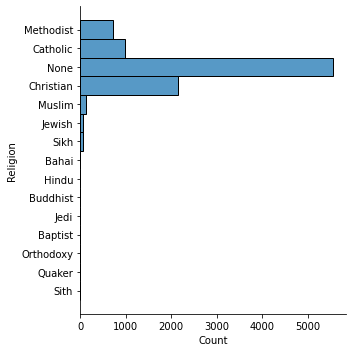

In [79]:
#Histogram of "Religion"

sns.displot(data=df, y='Religion')

In [80]:
df['Religion'].describe()

count     9687
unique      15
top       None
freq      5560
Name: Religion, dtype: object

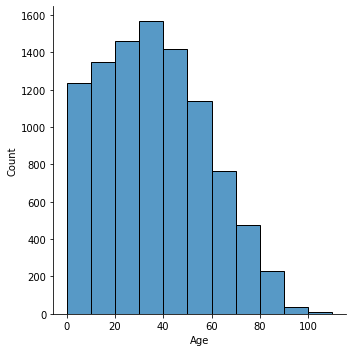

In [81]:
#Histogram of Age
sns.displot(data=df, x='Age', binwidth=10)

<AxesSubplot:>

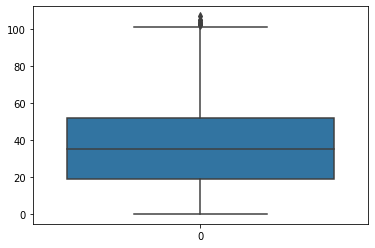

In [82]:
sns.boxplot(data=df.Age)

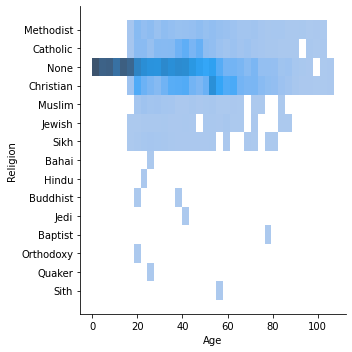

In [83]:
#Histogram of Age and Religion
sns.displot(data=df, x='Age', y='Religion')

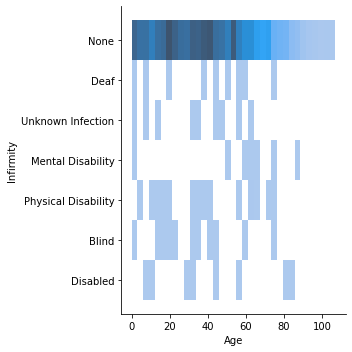

In [84]:
#Histogram of Age and Infirmity
sns.displot(data=df, x='Age', y='Infirmity')

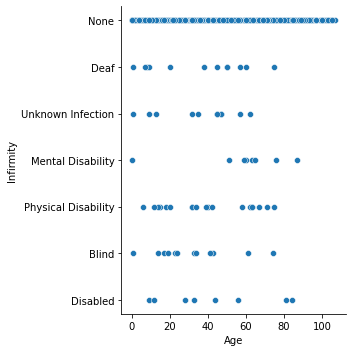

In [85]:
sns.relplot(data=df, x='Age', y='Infirmity')

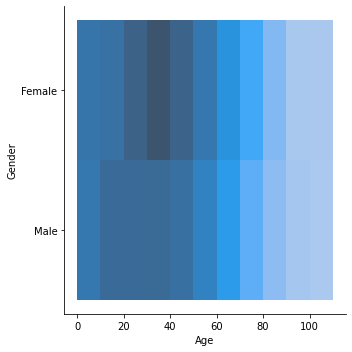

In [86]:
#Histogram of Age and Gender
sns.displot(data=df, x='Age', y='Gender', binwidth=10)

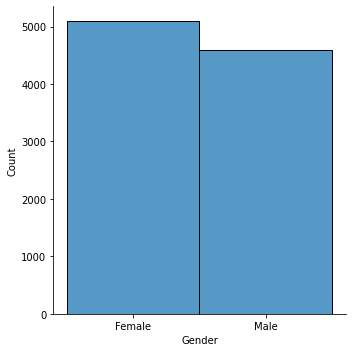

In [87]:
#Histogram of Gender
sns.displot(data=df, x='Gender', binwidth=5)

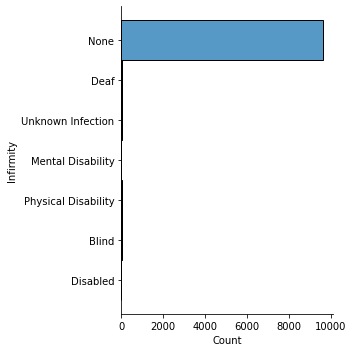

In [88]:
#Histogram of Infirmity
sns.displot(data=df, y='Infirmity')

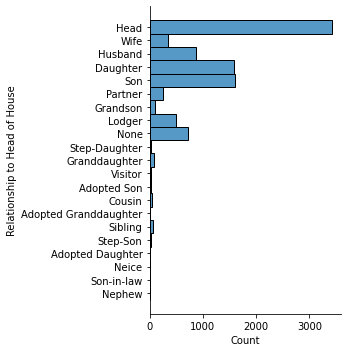

In [89]:
#Histogram of Relationship to Head of House
sns.displot(data=df, y='Relationship to Head of House')

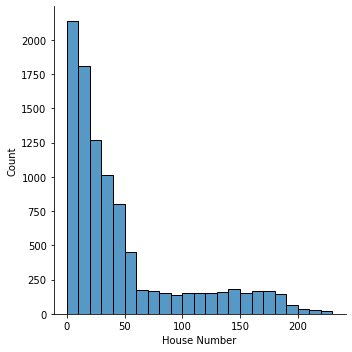

In [90]:
#Histogram of House Number
sns.displot(data=df, x='House Number', binwidth=10)

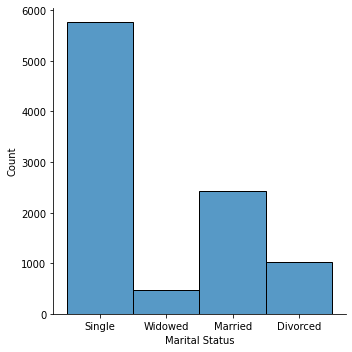

In [91]:
#Histogram of Marital status
sns.displot(data=df, x='Marital Status')

In [92]:
#Providing more details about the Age column, Male Age

Male=df[df['Gender']=='Male']
Male['Age']

2       88
6       43
10      54
12      54
16      22
        ..
9672    17
9673    16
9674    13
9681    48
9685     4
Name: Age, Length: 4590, dtype: int32

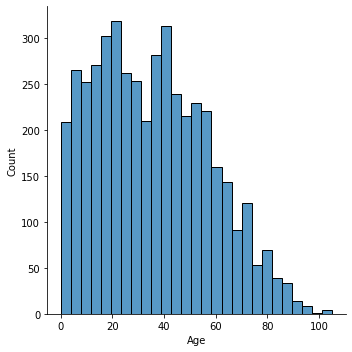

In [93]:
#Histogram Male Age
sns.displot(data=df, x=Male['Age'])

In [94]:
#Female Age
Female=df[df['Gender']=='Female']
Female['Age']

0       31
1       91
3       88
4       73
5       41
        ..
9680    46
9682    17
9683    11
9684     9
9686    69
Name: Age, Length: 5097, dtype: int32

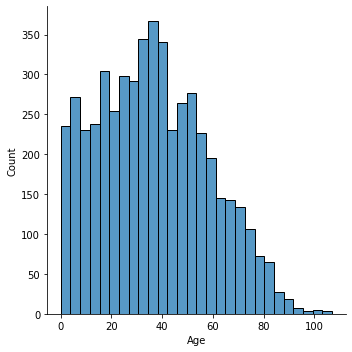

In [95]:
#Histogram of female Age
sns.displot(data=df, x=Female['Age'])

Age pyramid

In [96]:
#creating list
one,ten,twenty,thirty,fourty,fifty= 0,0,0,0,0,0 
sixty,seventy,eighty,ninety,hundred=0,0,0,0,0

In [97]:
#getting the Age class and Age count for Male
for age in Male['Age']:
    if age <=9:
        one +=1
    elif age >=10 and age<=19:
        ten +=1
    elif age >=20 and age<=29:
        twenty +=1
    elif age >=30 and age<=39:
        thirty +=1
    elif age >=40 and age<=49:
        fourty +=1
    elif age >=50 and age<=59:
        fifty +=1
    elif age >=60 and age<=69:
        sixty +=1
    elif age >=70 and age<=79:
        seventy +=1
    elif age >=80 and age<=89:
        eighty +=1
    elif age >=90 and age<=99:
        ninety +=1
    elif age >=100:
        hundred +=1
        

In [98]:
data =[one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninety,hundred]
data.reverse()

In [99]:
print(data)

[4, 24, 102, 215, 350, 535, 662, 700, 696, 697, 605]


In [100]:
#getting the Age class and Age count for female
one,ten,twenty,thirty,fourty,fifty= 0,0,0,0,0,0 
sixty,seventy,eighty,ninety,hundred=0,0,0,0,0

In [101]:
for age in Female['Age']:
    if age <=9:
        one +=1
    elif age >=10 and age<=19:
        ten +=1
    elif age >=20 and age<=29:
        twenty +=1
    elif age >=30 and age<=39:
        thirty +=1
    elif age >=40 and age<=49:
        fourty +=1
    elif age >=50 and age<=59:
        fifty +=1
    elif age >=60 and age<=69:
        sixty +=1
    elif age >=70 and age<=79:
        seventy +=1
    elif age >=80 and age<=89:
        eighty +=1
    elif age >=90 and age<=99:
        ninety +=1
    elif age >=100:
        hundred +=1

In [102]:
data=[one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninety,hundred]
data.reverse()

In [103]:
print(data)

[8, 13, 126, 262, 413, 605, 758, 868, 764, 650, 630]


[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

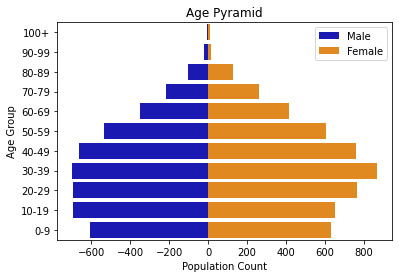

In [104]:
#Age pyramid
#Male count is multiplies by -1, to give the shape of pyramid.

import matplotlib.pyplot as plt
age_p = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', 
'30-39', '20-29', '10-19', '0-9'], 'Male': [-4, -24, -102, -215, -350, -535, -662, -698, -696, -697, -607],'Female': [8, 13, 126, 262, 413, 605, 758, 866, 763, 649, 629]})

AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, 
color=('mediumblue'), label='Male') 
 
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, 
color=('darkorange'), label='Female') 
 
age_pyramid.legend() 
plt.title('Age Pyramid') 

age_pyramid.set(xlabel='Population Count', ylabel='Age Group') 
 
    




In [105]:
age_p

,Age,Male,Female
0,100+,-4,8
1,90-99,-24,13
2,80-89,-102,126
3,70-79,-215,262
4,60-69,-350,413
5,50-59,-535,605
6,40-49,-662,758
7,30-39,-698,866
8,20-29,-696,763
9,10-19,-697,649


In [106]:
#unemployement by age, Gender, marital status and house Nunber
unemployed=df[df['Occupation']=='Unemployed']
age=unemployed['Age']
gender=unemployed['Gender']
marital_status=unemployed['Marital Status']
House_Number=unemployed['House Number']

Text(0.5, 0.98, 'Unemployment by Age')

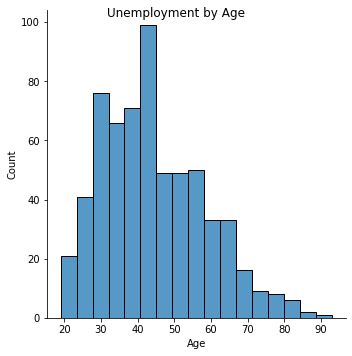

In [107]:
#Histogram of Unemployment by age  
x=sns.displot(data=unemployed, x=age)
x.fig.suptitle('Unemployment by Age') 

Text(0.5, 0.98, 'Unemployment by Gender')

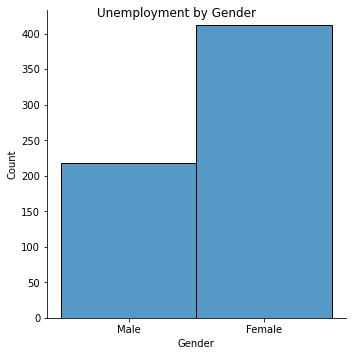

In [108]:
#Histogram of Unemployment by Gender 
x=sns.displot(data=unemployed, x=gender)
x.fig.suptitle('Unemployment by Gender')

Text(0.5, 0.98, 'Unemployment by Marital Status')

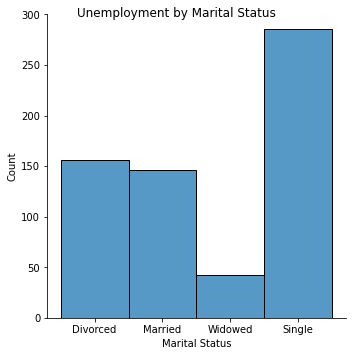

In [109]:
#Histogram of Unempolyed by Marital status
x=sns.displot(data=unemployed, x=marital_status)
x.fig.suptitle('Unemployment by Marital Status')

Text(0.5, 0.98, 'Unemployment by House Number')

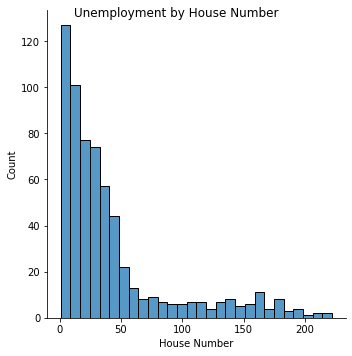

In [110]:
#histogram of Unemployment by House Number
x=sns.displot(data=unemployed, x= House_Number)
x.fig.suptitle('Unemployment by House Number')

In [111]:
#checking missing values(nan)
df.isnull().sum()

House Number                               0
Street                                     0
First Name                                 0
Surname                                    0
Age                                        0
Relationship to Head of House              0
Marital Status                             0
Gender                                     0
Occupation                                 0
Infirmity                                  0
Religion                                   0
House Number_ismissing                     0
Street_ismissing                           0
First Name_ismissing                       0
Surname_ismissing                          0
Relationship to Head of House_ismissing    0
Marital Status_ismissing                   0
Gender_ismissing                           0
Religion_ismissing                         0
num_missing                                0
dtype: int64

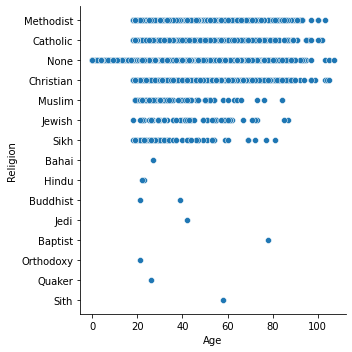

In [112]:
#plot of Religion and Age
sns.relplot(data=df, x='Age', y='Religion')

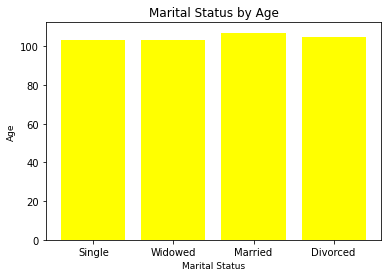

In [113]:
#bar plot Marital status by Age
x=df['Age']
y=df['Marital Status']
Colours= ['yellow']
plt.title('Marital Status by Age')
plt.bar(df['Marital Status'],df['Age'], color= Colours)
plt.xlabel('Marital Status', fontsize=9)
plt.ylabel('Age', fontsize=9)
plt.show()

In [114]:
df['Marital Status'].describe()

count       9687
unique         4
top       Single
freq        5761
Name: Marital Status, dtype: object

In [115]:
df['Age'].describe()

count    9687.000000
mean       35.909879
std        21.651665
min         0.000000
25%        19.000000
50%        35.000000
75%        52.000000
max       107.000000
Name: Age, dtype: float64

In [116]:
df['House Number'].describe()

count    9687.000000
mean       46.198617
std        51.459189
min         0.000000
25%        11.000000
50%        26.000000
75%        54.000000
max       228.000000
Name: House Number, dtype: float64

In [117]:
df['Gender'].describe()

count       9687
unique         2
top       Female
freq        5097
Name: Gender, dtype: object

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9687 entries, 0 to 9686
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   House Number                             9687 non-null   int32 
 1   Street                                   9687 non-null   object
 2   First Name                               9687 non-null   object
 3   Surname                                  9687 non-null   object
 4   Age                                      9687 non-null   int32 
 5   Relationship to Head of House            9687 non-null   object
 6   Marital Status                           9687 non-null   object
 7   Gender                                   9687 non-null   object
 8   Occupation                               9687 non-null   object
 9   Infirmity                                9687 non-null   object
 10  Religion                                 9687 non-null   obj

In [119]:
df.describe()

,House Number,Age,num_missing
count,9687.000000,9687.000000,9687.000000
mean,46.198617,35.909879,0.470424
std,51.459189,21.651665,0.845197
min,0.000000,0.000000,0.000000
25%,11.000000,19.000000,0.000000
50%,26.000000,35.000000,0.000000
75%,54.000000,52.000000,0.000000
max,228.000000,107.000000,3.000000


In [120]:
#getting more detials about male marital status
Male=df[df['Gender']=='Male']
Male['Marital Status']

2       Married
6       Married
10      Married
12       Single
16      Married
         ...   
9672     Single
9673     Single
9674     Single
9681    Married
9685     Single
Name: Marital Status, Length: 4590, dtype: object

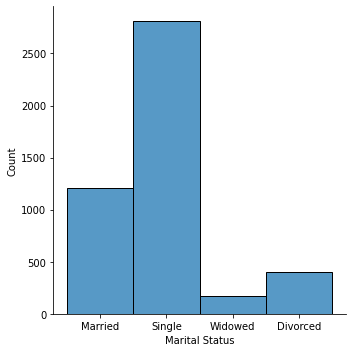

In [121]:
#histogram of male marital status
sns.displot(data=df, x=Male['Marital Status'])

In [122]:
#More details on female Marital Status
Female=df[df['Gender']=='Female']
Female['Marital Status']

0        Single
1       Widowed
3       Married
4       Widowed
5       Married
         ...   
9680    Married
9682     Single
9683     Single
9684     Single
9686    Widowed
Name: Marital Status, Length: 5097, dtype: object

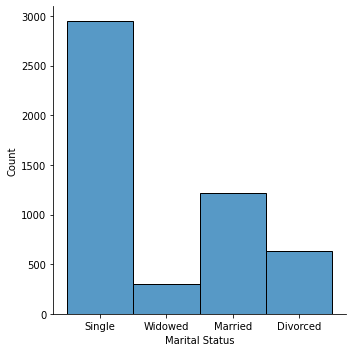

In [123]:
#histogram of Female Marital Status
sns.displot(data=df, x=Female['Marital Status'])

In [124]:
#getting more details on student
Student=df[df['Occupation']=='Student']
Student['Occupation']

7       Student
17      Student
48      Student
49      Student
50      Student
         ...   
9675    Student
9676    Student
9682    Student
9683    Student
9684    Student
Name: Occupation, Length: 1806, dtype: object

In [125]:
Student['Occupation'].count()

1806

In [126]:
df['Occupation']

0                            Producer, radio
1              Retired Administrator, sports
2                         Retired Bookseller
3                   Retired Industrial buyer
4            Retired Scientist, audiological
                        ...                 
9682                                 Student
9683                                 Student
9684                                 Student
9685                                   Child
9686    Retired Research officer, government
Name: Occupation, Length: 9687, dtype: object

CRUDEBIRTHRATE

In [127]:
TOTALPOPULATION = len(df)
print(len(df))

9687


In [128]:
LIVEBIRTHS = len(df[df['Age'] == 0])
print(len(df[df['Age'] == 0]))

95


In [129]:
CRUDEBIRTHRATE = (LIVEBIRTHS/TOTALPOPULATION)*1000
print(CRUDEBIRTHRATE)

9.806957778465986


In [130]:
BABIES0 = df['Age'] == 0
BABIES4 = df['Age'] == 4
BABIES8 = df['Age'] == 8

CRUDEBIRTHRATE0 = (len(df[BABIES0])/TOTALPOPULATION)*1000

CRUDEBIRTHRATE4 = (len(df[BABIES4])/len(df))*1000

print(f"Present Crude Birthrate per 1000: {CRUDEBIRTHRATE0}")

print(f"Previous Crude Birthrate per 1000: {CRUDEBIRTHRATE4}")

print(f"Present CBR Change from Previous per 1000: {CRUDEBIRTHRATE0-CRUDEBIRTHRATE4}")





Present Crude Birthrate per 1000: 9.806957778465986
Previous Crude Birthrate per 1000: 11.458655930628678
Present CBR Change from Previous per 1000: -1.6516981521626928


AGE SPECIFIC FERTILITY

In [131]:
BIRTHS2529 = len(df[df['Age'] == 0])
Age2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
Age2529 = len(df[Age2529])

print((BIRTHS2529/Age2529)*1000)

262.43093922651934


In [132]:
# Female of childbearing age, corresponding to above year gaps

Age2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
Age3034 = (df['Age'].between(30,34)) & (df['Gender'] == 'Female')
Age3540 = (df['Age'].between(35,39)) & (df['Gender'] == 'Female')

# AGESPECIFICFERTILITY

ASFR2529 = (len(df[BABIES0])/len(df[Age2529]))*1000
ASFR3034 = (len(df[BABIES4])/len(df[Age3034]))*1000
ASFR3540 = (len(df[BABIES8])/len(df[Age3540]))*1000

print(f"AGESPECIFICFERTILITYRATE 25-29 per 1000 {ASFR2529}")
print(f"AGESPECIFICFERTILITYRATE 30-34 per 1000 {ASFR3034}")
print(f"AGESPECIFICFERTILITYRATE 35-40 per 1000 {ASFR3540}")

AGESPECIFICFERTILITYRATE 25-29 per 1000 262.43093922651934
AGESPECIFICFERTILITYRATE 30-34 per 1000 261.7924528301887
AGESPECIFICFERTILITYRATE 35-40 per 1000 238.73873873873873


GENERAL FERTILITY RATE

In [133]:
TOTALBIRTHS = len(df[BABIES0]) +  len(df[BABIES4]) + len(df[BABIES8])
CRUDEBIRTHAGE = len(df[Age2529])+ len(df[Age3034])+len(df[Age3540])

GENERALFERTILITYRATE = TOTALBIRTHS/CRUDEBIRTHAGE

print(f"GENERAL FERTILITY RATE: {GENERALFERTILITYRATE*1000}")

GENERAL FERTILITY RATE: 253.65853658536585


CRUDE DEATH RATE

In [134]:
AGINGPOPULATION = df[df['Age'].between(65,99)].groupby('Age').size().sort_index(ascending=False)
AGINGPOPULATION

Age
99     1
97     6
96     1
95     3
94     3
93     7
92     4
91     4
90     8
89    13
88    16
87    19
86    18
85    16
84    26
83    21
82    34
81    36
80    29
79    40
78    35
77    29
76    35
75    30
74    55
73    61
72    58
71    75
70    59
69    66
68    52
67    67
66    68
65    63
dtype: int64

In [135]:
# moving the ages up one to copy last year's 'counts' per age

CALCULATEDAGES = AGINGPOPULATION.shift(-1)
CALCULATEDAGES


Age
99     6.0
97     1.0
96     3.0
95     3.0
94     7.0
93     4.0
92     4.0
91     8.0
90    13.0
89    16.0
88    19.0
87    18.0
86    16.0
85    26.0
84    21.0
83    34.0
82    36.0
81    29.0
80    40.0
79    35.0
78    29.0
77    35.0
76    30.0
75    55.0
74    61.0
73    58.0
72    75.0
71    59.0
70    66.0
69    52.0
68    67.0
67    68.0
66    63.0
65     NaN
dtype: float64

In [136]:
# calculating the difference between our two sets

DIFF = AGINGPOPULATION - CALCULATEDAGES

#  dataframe

DIFF = DIFF.reset_index(name='Count')

# focus on deaths - not emigration!! So we want minus counts only

DEATHS = DIFF[DIFF['Count'] < 0]
DEATHS

,Age,Count
0,99,-5.0
2,96,-2.0
4,94,-4.0
7,91,-4.0
8,90,-5.0
9,89,-3.0
10,88,-3.0
13,85,-10.0
15,83,-13.0
16,82,-2.0


In [137]:
DEATHRATE = abs(((DEATHS['Count']).sum())/TOTALPOPULATION)*1000
DEATHRATE

14.34912769691339

CRUDE GROWTH RATE

In [138]:
print(f"CRUDEGROWTHRATE {CRUDEBIRTHRATE - DEATHRATE}")
print(f"CRUDEGROWTHRATE as Percentage {(CRUDEBIRTHRATE-DEATHRATE)/10}%")

CRUDEGROWTHRATE -4.542169918447405
CRUDEGROWTHRATE as Percentage -0.45421699184474046%


In [139]:
# brief method to show occupancy rates

HOUSEHOLD = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
HOUSEHOLD

,House Number,Street,Occupancy Count
0,0,Baker Land,1
1,0,Gregory Rapids,2
2,0,Yellow Inlet,1
3,1,Ali Estates,2
4,1,Anglia Creek,2
...,...,...,...
3420,224,Jones Hill,1
3421,225,Bishop Road,1
3422,226,Bishop Road,1
3423,227,Bishop Road,1


In [140]:
df['Street'].describe()

count              9687
unique              105
top       Lee Stravenue
freq               1199
Name: Street, dtype: object

In [141]:
df['House Number'].describe()

count    9687.000000
mean       46.198617
std        51.459189
min         0.000000
25%        11.000000
50%        26.000000
75%        54.000000
max       228.000000
Name: House Number, dtype: float64

In [142]:
#mode of House Number
House_Number=df['House Number']
print("Mode:", House_Number.mode())

Mode: 0    1
dtype: int32
